In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
%matplotlib inline 

from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage.color import rgb2gray
from scipy.spatial.distance import squareform
from scipy.misc import imread
from transparent_imshow import transp_imshow
import matplotlib.cm as cm
from scipy import ndimage, misc

import sys
sys.path.append("..")


In [2]:
lines = glob.glob('../data/gray/all/lines/*')
drawings = glob.glob('../data/gray/all/drawings/*')

In [ ]:
drawings


In [99]:
whitespace_dict = {164: 200.2, 202: 200.5, 425: 208., 345: 237.4, 72: 216.2, 363: 247.7, 509: 207.9, 257: 201.2, 183: 252.4}
lines_by_img_dict = {k: [] for k in whitespace_dict.keys()}
drawings_by_dict = {k: [] for k in whitespace_dict.keys()}

In [100]:
for file in lines:
    file_key = int(file.split('/')[5].split('_')[0])
    if file_key == 203:
        continue
    else:
        lines_by_img_dict[file_key].append(imread(file, mode = 'L'))

/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [101]:
for file in drawings:
    file_key = int(file.split('/')[5].split('_')[0])
    if file_key == 203:
        continue
    else:
        drawings_by_dict[file_key].append(imread(file, mode = 'L'))

/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [41]:
test = np.array(lines_by_img_dict[164])

In [86]:
def mean_pixel_intensity(img, my_dict):
    np_arr = np.array(my_dict[img])
    n_imgs = np_arr.shape[0]
    mean_pixel_intensity = np.zeros((30, 30))
    for i in range(30):
        for j in range(30):
            mean_pixel_intensity[i, j] = np.mean(np_arr[:, i, j])
    return mean_pixel_intensity, n_imgs

    

In [79]:
# mean_line_164 = mean_pixel_intensity(164, lines_by_img_dict)

In [80]:
lines_by_img_dict.keys()

dict_keys([164, 202, 425, 345, 72, 363, 509, 257, 183])

Text(0.5, 0.98, 'Lines')

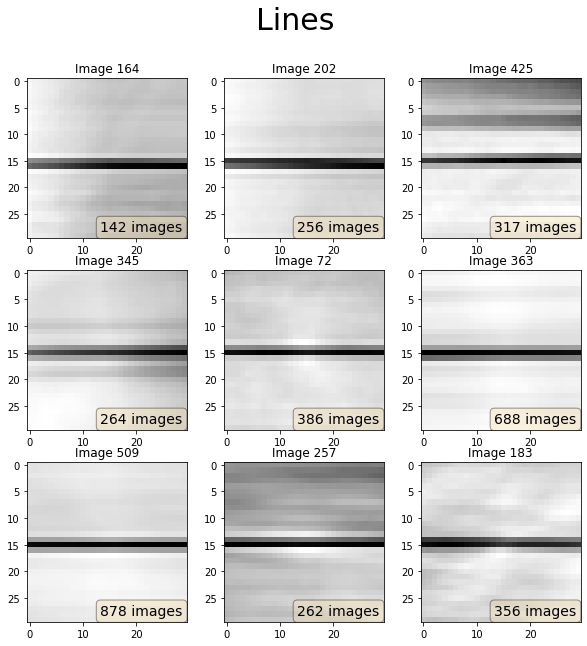

In [103]:
fig, ax = plt.subplots(3, 3, figsize = (10, 10))
a = ax.flatten()
for i, key in enumerate(lines_by_img_dict.keys()):
    x = lines_by_img_dict
    img, n = mean_pixel_intensity(key, x)
    a[i].imshow(img, cmap='gray')
    a[i].set_title('Image {}'.format(key))
    textstr = '{} images'.format(n)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)

    # place a text box in upper left in axes coords
    a[i].text(0.46, 0.11, textstr, transform=a[i].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    
    
fig.suptitle('Lines', fontsize = 30)

Text(0.5, 0.98, 'Drawings')

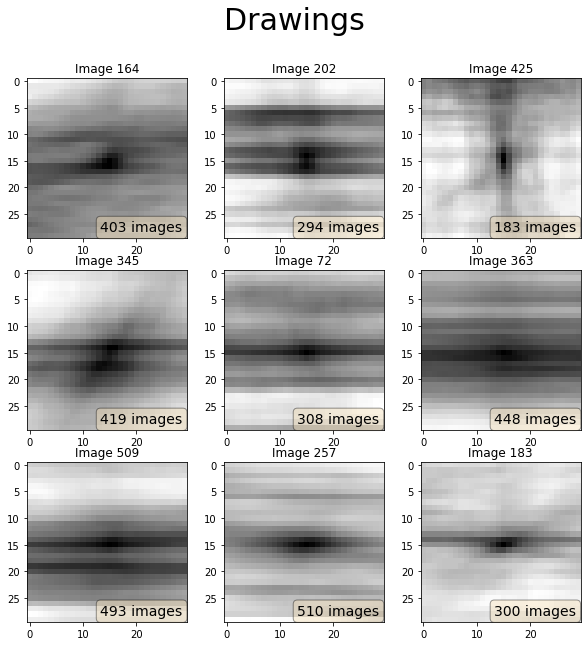

In [104]:
fig, ax = plt.subplots(3, 3, figsize = (10, 10))
a = ax.flatten()
for i, key in enumerate(lines_by_img_dict.keys()):
    x = drawings_by_dict
    img, n = mean_pixel_intensity(key, x)
    a[i].imshow(img, cmap='gray')
    a[i].set_title('Image {}'.format(key))
    textstr = '{} images'.format(n)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)

    # place a text box in upper left in axes coords
    a[i].text(0.46, 0.11, textstr, transform=a[i].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
#     plt.colorbar(a[i])
fig.suptitle('Drawings', fontsize = 30)